In [2]:
import pymysql
import pandas as pd
import numpy as np
from IPython.display import display, clear_output
from ipywidgets import Dropdown
import matplotlib.pyplot as plt 
from ipywidgets import SelectMultiple
import seaborn as sns
connect = pymysql.connect(host='127.0.0.1', user='root', password='0000', db='practice', charset='utf8')
cur = connect.cursor()


test = "SELECT * FROM practice.train;"
cur.execute(test)
test = pd.DataFrame(cur.fetchall())
test.columns = ['ID','Warehouse_block','Mode_of_Shipment','Customer_care_calls','Customer_rating',
                'Cost_of_the_Product','Prior_purchases','Product_importance','Gender','Discount_offered',
                'Weight_in_gms','Reached.on.Time_Y.N']
test1 = "SELECT * FROM practice.train1;"
cur.execute(test1)
test1 = pd.DataFrame(cur.fetchall())
test1.columns = ['Mode_of_Shipment','code']

test = pd.merge(test,test1,on='Mode_of_Shipment',how='left')
df_id = test["ID"]
test = test.drop(columns=["ID"])


Text(0.5, 1.0, '무게(g)')

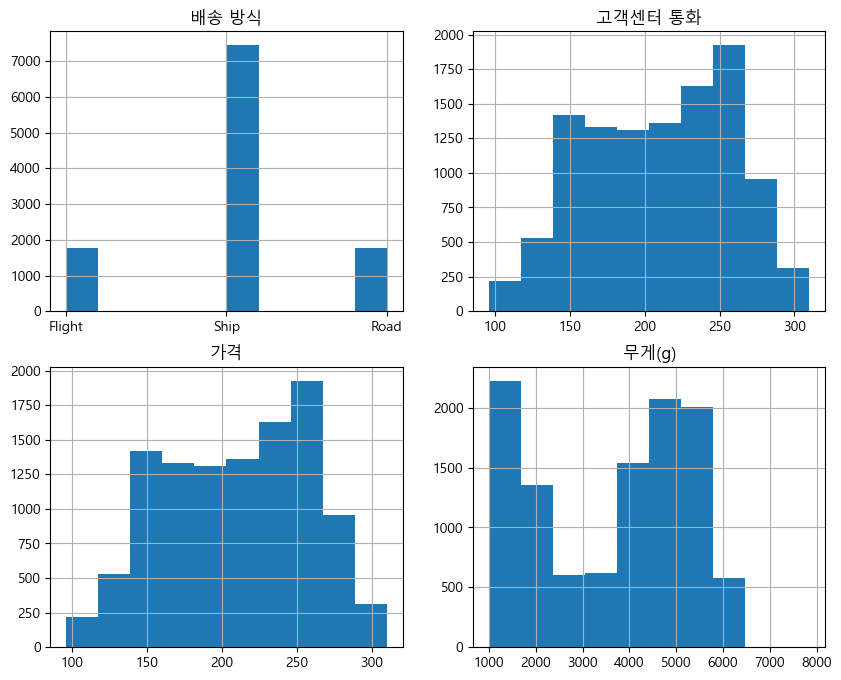

In [3]:
plt.rcParams["font.family"] = "Malgun Gothic" #한글 폰트 지정
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

test['Mode_of_Shipment'].hist(ax=axes[0,0])
axes[0,0].set_title('배송 방식')

test['Cost_of_the_Product'].hist(ax=axes[0,1])
axes[0,1].set_title('고객센터 통화')

test['Cost_of_the_Product'].hist(ax=axes[1,0])
axes[1,0].set_title('가격')

test['Weight_in_gms'].hist(ax=axes[1,1])
axes[1,1].set_title('무게(g)')

In [ ]:
def multi(val):
    clear_output()
    display(dropdown)
    pick_data = test.loc[(test['code']==val['new'])]
    display(pick_data.head())
list = test1['code'].tolist()
dropdown = Dropdown(options=list,description='지역 선택:')
dropdown.observe(multi,names ='value')
display(dropdown)

Dropdown(description='지역 선택:', index=1, options=('비행기', '배', '도로'), value='배')

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,code
17,F,Ship,5,5,227,3,medium,M,36,3952,1,배
18,D,Ship,5,5,239,3,high,M,18,2495,1,배
19,F,Ship,4,5,145,3,medium,M,45,1059,1,배
20,A,Ship,3,3,161,2,medium,F,38,1521,1,배
21,B,Ship,3,1,232,4,medium,F,51,2899,1,배


Dropdown(description='지역 선택:', index=1, options=('비행기', '배', '도로'), value='배')

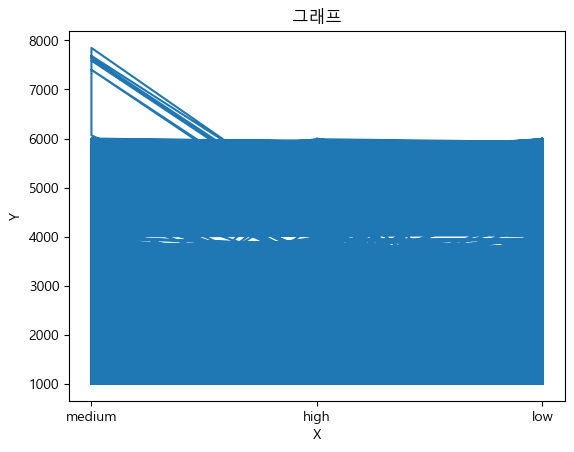

In [5]:
def graph(val):
    clear_output()
    display(dropdown1)
    pick_data = test.loc[(test['code']==val['new'])]
    x = pick_data['Product_importance']
    y = pick_data['Weight_in_gms']
    plt.plot(x, y)
    plt.xlabel('X')  # X축 레이블에 한글 폰트 적용
    plt.ylabel('Y')  # Y축 레이블에 한글 폰트 적용
    plt.title('그래프')  # 그래프 제목에 한글 폰트 적용
    plt.show()
    
list = test1['code'].tolist()

dropdown1 = Dropdown(options=list, description='지역 선택:')
dropdown1.observe(graph,names='value')
display(dropdown1)

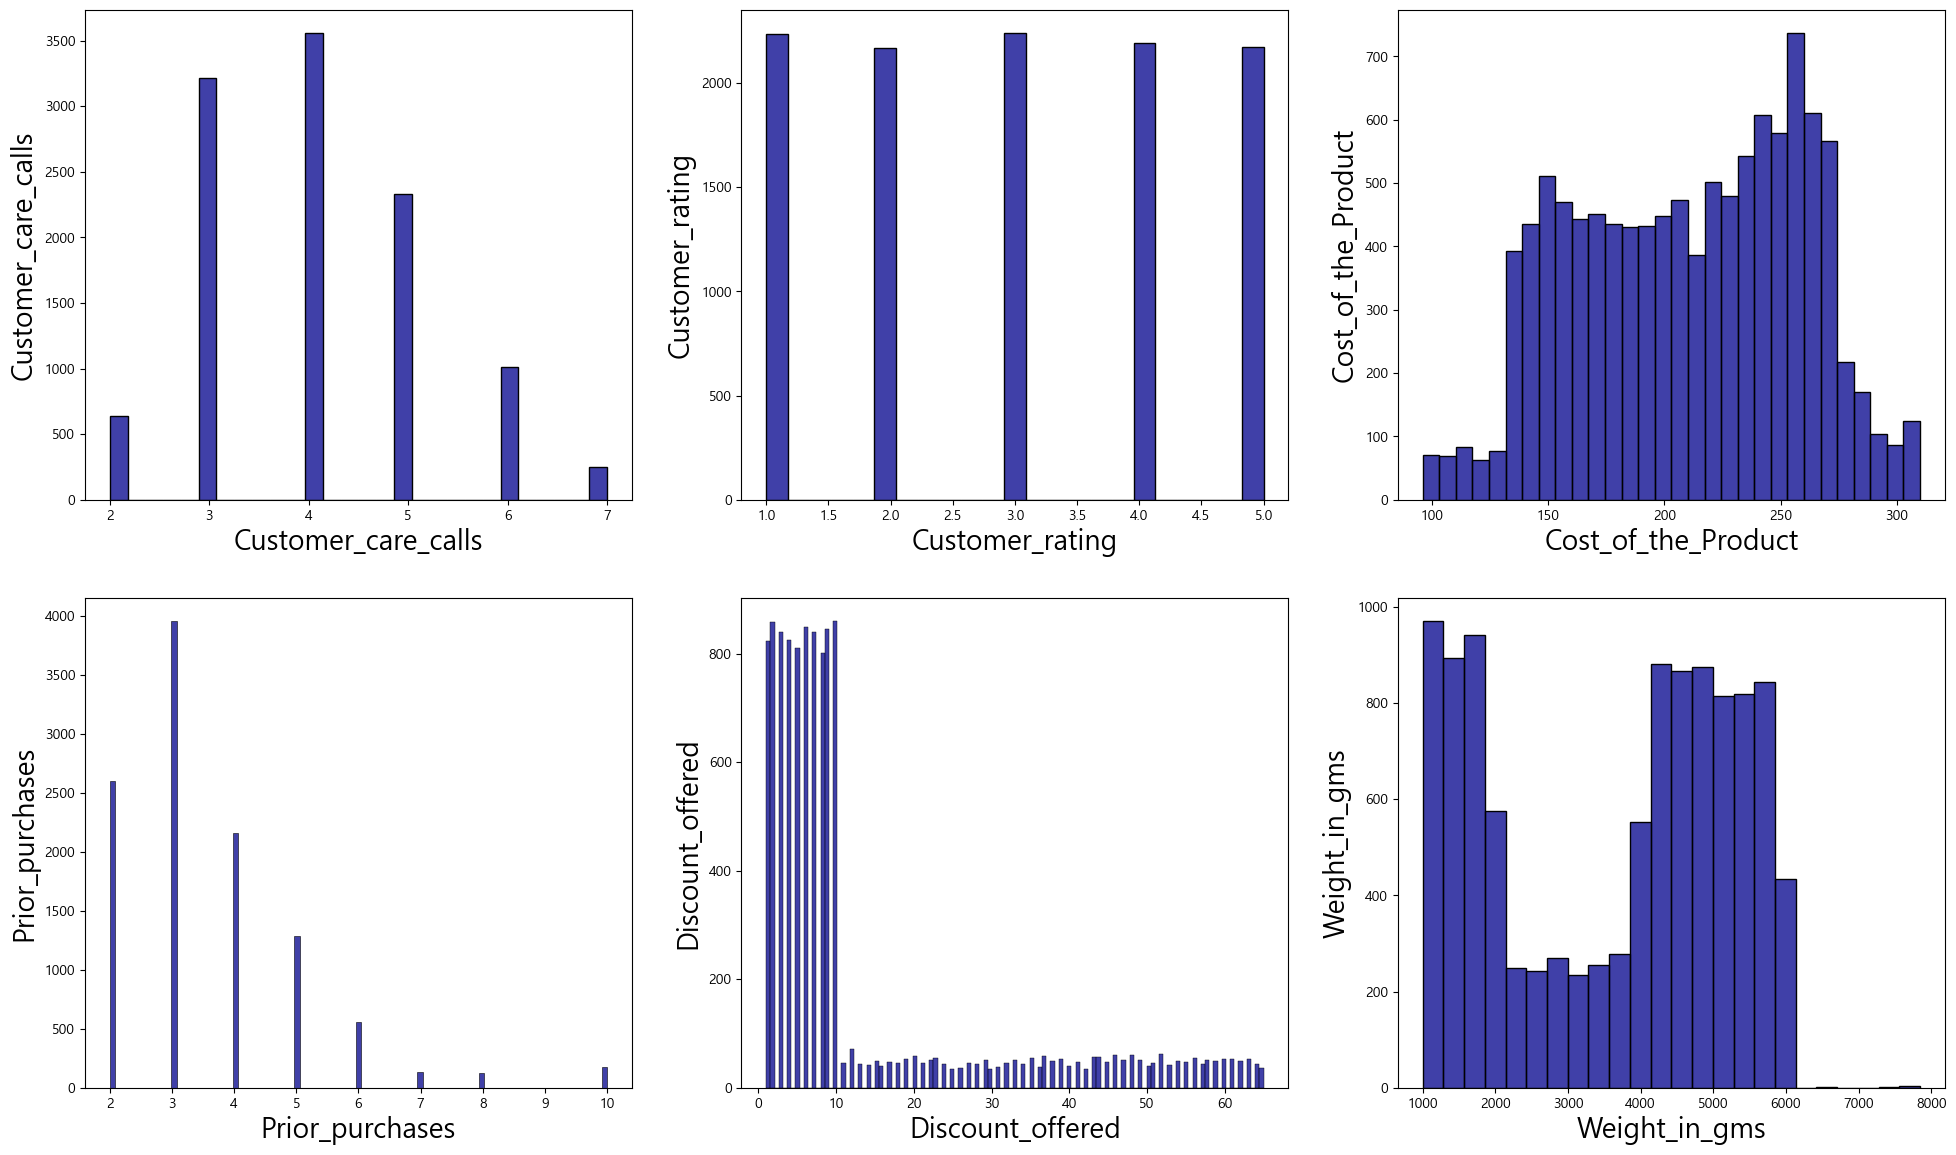

In [6]:
dfnum = test.drop(columns = ['Warehouse_block', 'Mode_of_Shipment',
                                  'Product_importance', 'Gender',
                                  'Reached.on.Time_Y.N'])
fig,ax= plt.subplots(ncols=3,nrows=2,figsize=(24,14)) 
for variable, subplot in zip(dfnum.columns,ax.flatten()): #flatten 서브플롯 객체 배열은 일반적으로 2차원 이상이지만 사용시 1차원 배열로 반복하게 만듦
    distdetails = sns.histplot(x = dfnum[variable], color = 'darkblue', ax=subplot) 
    distdetails.set_xlabel(variable, fontsize = 20)
    distdetails.set_ylabel(variable, fontsize = 20)
    
plt.show()

<Axes: xlabel='Reached.on.Time_Y.N'>

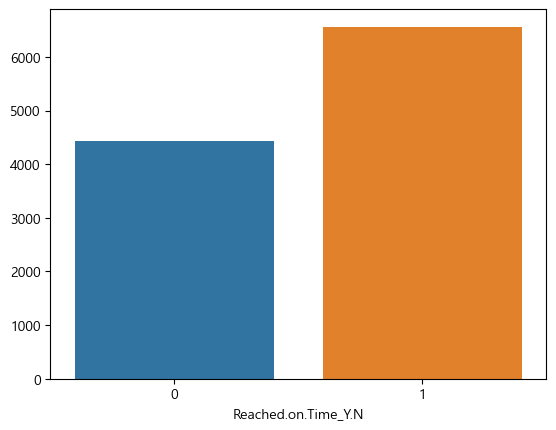

In [7]:
sns.barplot(x=test['Reached.on.Time_Y.N'].value_counts().index,y=test['Reached.on.Time_Y.N'].value_counts().values)

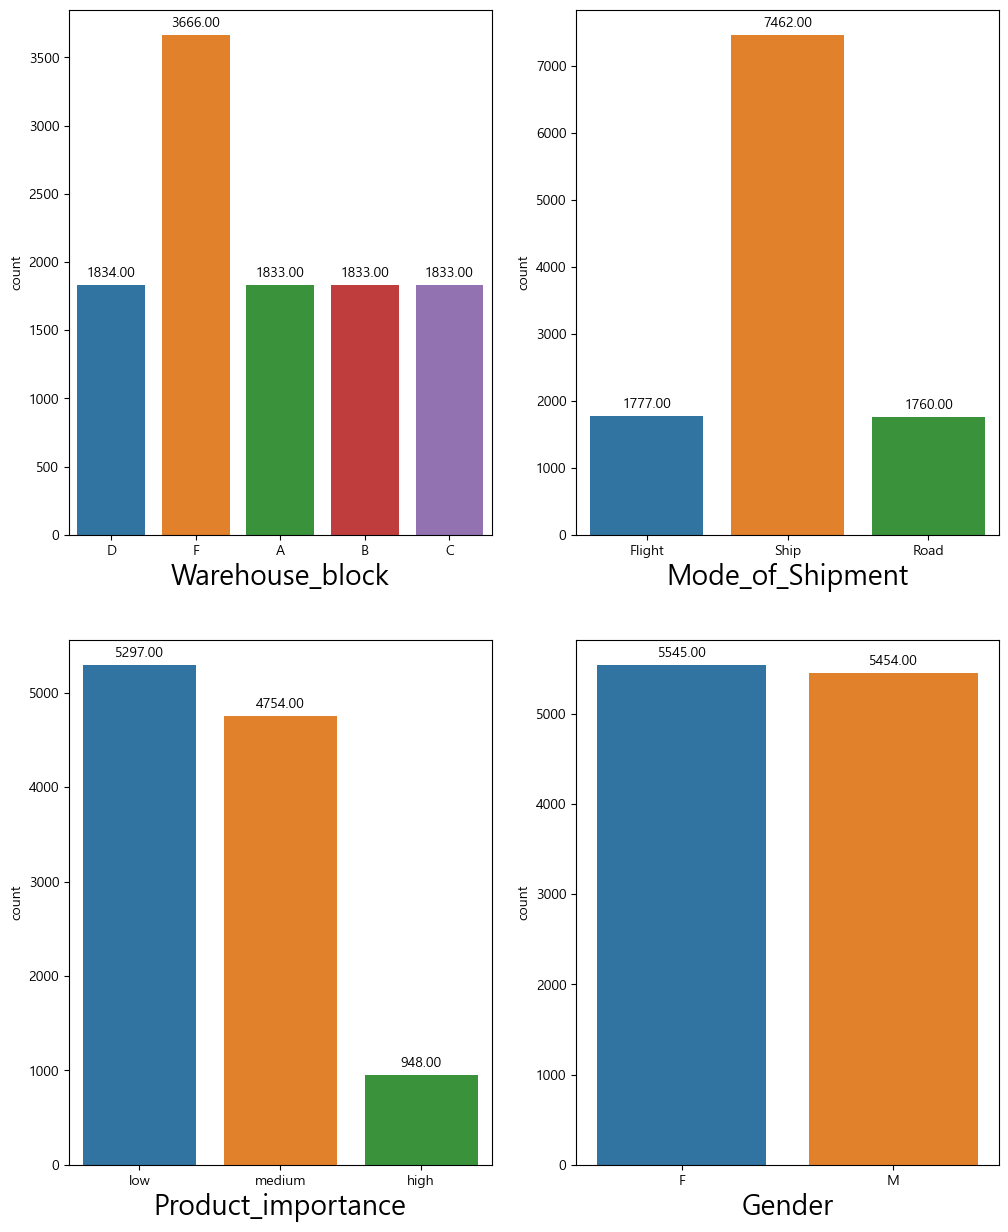

In [8]:
category = test.select_dtypes(include='object') #object타입만 골라 사용
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,15))
for value, subplot in zip(category.columns, ax.flatten()):
    plot = sns.countplot(x=category[value], ax=subplot)
    plot.set_xlabel(value, fontsize=20)
    plot.set_xticklabels(plot.get_xticklabels())

    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
        xytext=(0, 6), textcoords='offset points')

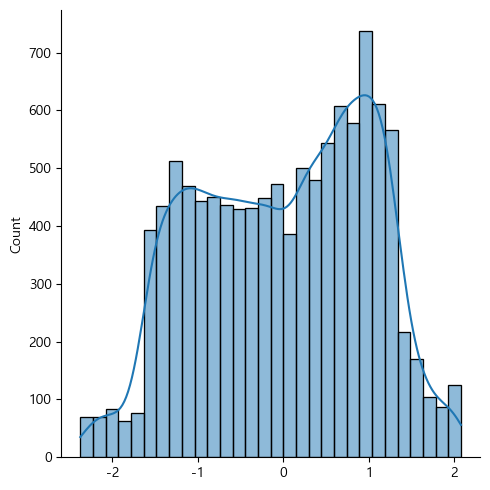

In [9]:
import scipy.stats as stats

plt.rcParams['axes.unicode_minus'] = False
score_df = test['Cost_of_the_Product']
score_df = score_df.to_numpy() #넘파이 배열로 변환 
score = stats.zscore(score_df) #표준편차 변환
sns.displot(data = score,kde=True)

In [11]:
import statsmodels.api as sm
newdata_df = test[['Customer_rating']]
newdata_df = sm.add_constant(newdata_df,prepend = True)
newdata_df

,const,Customer_rating
0,1.0,2
1,1.0,5
2,1.0,2
3,1.0,3
4,1.0,2
...,...,...
10994,1.0,1
10995,1.0,1
10996,1.0,4
10997,1.0,2


In [16]:
mod_log = sm.OLS(test['Customer_care_calls'], newdata_df)
res_log = mod_log.fit()

display(res_log.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Customer_care_calls   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.639
Date:                 Sun, 11 Jun 2023   Prob (F-statistic):              0.200
Time:                         18:37:47   Log-Likelihood:                -17061.
No. Observations:                10999   AIC:                         3.413e+04
Df Residuals:                    10997   BIC:                         3.414e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.0250      0.025    158.034      0.000       3.975       4.075
Customer_rating     0.0099      0.008      1.280      0.200      -0.005       0.025
==============================================================================
Omnibus:                      323.475   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.654
Skew:                           0.391   Prob(JB):                     3.18e-71
Kurtosis:                       2.691   Cond. No.                         8.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Customer_care_calls', ylabel='Customer_rating'>

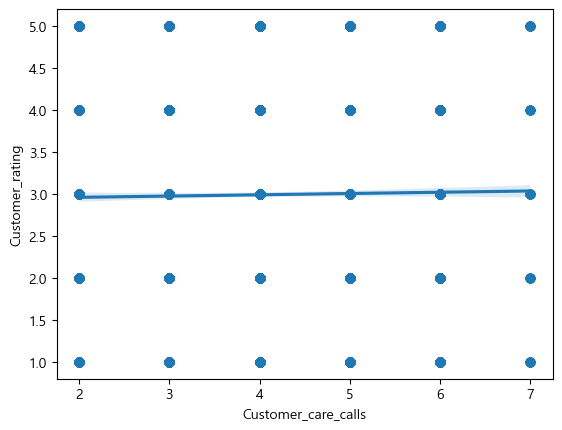

In [17]:
sns.regplot(x=test['Customer_care_calls'],y = newdata_df['Customer_rating'])